# Download and Analysis Stream Discharge by using PyHSPF

The traditional way of collecting water data require users go to national water information system website to download the data step-by-step.  Then, the users analyze those data by using some assistant software such as ArcGIS, QGIS, and Excel. This process is easy for only studying a small size of data. However, in real environmental applications the researchers might require a mass of data across a huge period time. Manually download data from website is impossible. Some of the software that used for analysis are also payment. And the price is expensive. Python programing language is a good product to replace this tedious and expensive process. Python has readability and open-source nature. It allows users flexible extend additional packages to build applications.

In this program, the Hydrological Simulation Program-FORTRAN (HSPF) package is used for simulate and download the hydrological information and data. During the HSPF package is a program that based on Fortran language, the users should convert this package into python language. Here is a link for a converted PyHSPF package on Github webpage (created by Doctor David Lampert): https://github.com/djlampert/PyHSPF 

The built program is based on this extended PyHSPF package. For demonstrating this program, a gage station on North Canadian River near Harrah, OK was selected to display its monitoring data of water discharge. 




# Process of python code

The built program require use the OS library, datetime library, and pickle library in python progress. Here, I import all the required libraries. The graph plotting requires import matplotlib library. The NWISExtractor class was import from preprocessing folder under pyhspf package.

Two required metadata information of selected gage station:  

|Required metadata inf.|No.|
|:-|:----|
|$Gagestation  ID $|'07241550'|  
|$HUC8-digit$|'11100302'|  

The 8-digit Hydrological Unit Code(HUC8) shapefile information could be found on https://www.hydroshare.org/resource/b832a6c2f96541808444ec9562c5247e/  
Using free QGIS can open shapefile.

The Gagestation ID number also can be found by using QGIS after downloading the metadata information of entire stations in USA.
<img src=https://lh3.googleusercontent.com/proxy/qh12iQKCNdvneXFtv29dspCEaMm-pvjeMyRNsZge9Gi8Ux_xZdQJCY92OR84FL7C5thbDIDEXbopT4-8jb31orQb_WH7SAXZ2C_UAVJ5jnPnIZs8JdNCLZqZehCovFVtTkc7tfwR08vWGdvv8LYAeNYxnG5RUYd9IDs><cite data-cite="North Canadian River Watershed Study Area">(North Canadian River Watershed Study Area, (n.d.))</cite>

In [4]:
import os,datetime,pickle,numpy
from matplotlib import pyplot as plt
from pyhspf.preprocessing import NWISExtractor


gageid='07241550'
NWIS = 'NWIS-metadata'
watershed_HUC8='11100302'
directory = 'DATA-{}'.format(watershed_HUC8)

nwisextractor = NWISExtractor(NWIS) #check the NWIS folder, see if it existed.
                                    # if not, the process will create a NWIS folder
    
#Download the metadata information of entire gagestations in USA.
#And extract selected metadata information into created 'DATA' forlder.
nwisextractor.extract_HUC8(watershed_HUC8, directory) 

NWIS directory NWIS-metadata exists

NWIS source metadata file NWIS-metadata/USGS_Streamgages-NHD_Locations_Shape.zip is present

gage metadata NWIS-metadata/USGS_Streamgages-NHD_Locations is present

gage station file DATA-11100302/gagestations exists



In this part, the code will check the data files under the created 'DATA-{}' folder. If the condition didn't confirm, the loop will call the 'download_all' process under the 'NWISExtractor' class and plot all the downloaded metadata.

The start and send datetime setting are indicating the period data time that researchers interested in. You can adjust the datetime by just change the number of time in the brackets.


In [5]:
start = datetime.datetime(1960, 1, 1)      # start date for timeseries
end   = datetime.datetime(2020, 1, 1)      # end date for timeseries

#Path to all the HUC8 vector data is obtained and extracted
gagepath='{}/gagedata'.format(directory)    
if not os.path.isdir(gagepath):
    nwisextractor.download_all(start, end, output = gagepath)
    
#Check and extract the selected gagestation data from  gagedata folder   
gagedata  = 'North Canadian River near Harrah' #give a name for the extracted station data
nwisextractor.download_gagedata(gageid, start, end, output = gagedata)
print('End download')

gage data for 07241550 exist

End download


The attributes of selected gagestation can be found and displayed by using following code:

In [8]:
filename = '{}/{}'.format(gagepath,gageid)    #identify filename as the picked_gageid file 
                                           #under 'data-curves' folder.
with open(filename, 'rb') as file: #open indeicated filename file  for read only in binary format
                              #and ensure the file is 'clean up' after finish the process  
                              
        
    station = pickle.load(file)     #to load pickled data from selected file
    
print('The water flow information for the {}'.format(station.name))
print('')
# the following are attributes of the station directly from the database
print('Gage ID:                     ', station.gageid)
print('Name:                        ', station.name)
print('State:                       ', station.state)
print('First day of measurement:    ', station.day1)
print('Last day of measurement:     ', station.dayn)
print('Drainage area (square miles):', station.drain)
print('Average flow (cfs):          ', station.ave)
print('NWIS url:                    ', station.web)

The water flow information for the North Canadian River near Harrah, OK

Gage ID:                      07241550
Name:                         North Canadian River near Harrah, OK
State:                        OK
First day of measurement:     19681001
Last day of measurement:      20040930
Drainage area (square miles): 13501.0
Average flow (cfs):           481.668
NWIS url:                     http://waterdata.usgs.gov/nwis/nwisman/?site_no=07241550


# Data analysis
In this program case, I am interested in the hydrograph and flow duration curve of year 2019. The 's' and 'e' are the start and end time set for the interested period. The code also import 'scipy.stats' to plot the flow duration curve. More details of 'scipy' package could see below link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html 

The hydrograph and flow duration curve for site 07241550 in 2019


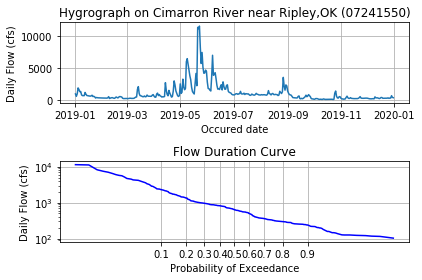

Maximum flow (cfs):        11600.0
Maximum flow occur at:     2019-05-23 00:00:00


In [9]:
s = datetime.datetime(2019, 1, 1)  # Start date 
e = datetime.datetime(2020, 1, 1)   # End date

data = station.make_timeseries(start = s, end = e) # calling 'make_timeseries' program under 
                                                    #'GageStation' class
deltat=datetime.timedelta(days=1) #set the time interval as 1 day.  
  
a=[]
print('The hydrograph and flow duration curve for site {} in {}'.format(gageid,s.year))
for i in range(len(data)):
    a.append(s+i*deltat)

s1=plt.subplot(211)
s1.set_title('Hygrograph on Cimarron River near Ripley,OK ({})'.format(gageid))
s1.set_ylabel('Daily Flow (cfs)')
s1.set_xlabel('Occured date')
s1.plot(a,data)
plt.grid(True)

from scipy import stats
norm = stats.norm(0,1) #the range of setting normal continuous random variable
ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # set the ticks of the Percent point function
norm_ticks = [norm.ppf(t) for t in ticks]    #Percent Points based on giving ticks


data1=data.copy()   # copy the array values from old one
data1.sort()       #rearrange array values from small to large
s2=plt.subplot(212)
s2.set_title('Flow Duration Curve')
s2.set_yscale('log')
s2.set_ylabel('Daily Flow (cfs)')
s2.set_xlabel('Probability of Exceedance')
s2.xaxis.set_ticks(norm_ticks)
s2.set_xticklabels(ticks)
daily=[norm.ppf(L/len(data1)) for L in range(len(data1))]
daily.reverse()
s2.plot(daily, data1, '-', color = 'blue')
plt.grid(True)
plt.tight_layout()
plt.show()

#Find out the maximum flow rate and occured date in the setting monitoring period
print('Maximum flow (cfs):       ', numpy.amax(data))
position = data.index(numpy.amax(data))  #find the MAX.occur position in the array
t_position=deltat*position+s

print('Maximum flow occur at:    ', t_position)

The attributes information shows the first date of starting measurement in this gage station. based on this information, below code find out the historical recorded maximum flow and its occured date.

In [10]:
s_max=datetime.datetime(1969, 1, 1) # start measuring date
e_max=datetime.datetime(2020, 1, 1)  # end date of setting period time
max_data=station.make_timeseries(start = s_max, end = e_max)
print('Historical maximum flow (cfs):       ', numpy.amax(max_data))
position_max = max_data.index(numpy.amax(max_data))  #find the MAX.occur position in the array
t_position_max=deltat*position_max+s_max
print('Historical maximum flow occur at:    ', t_position_max)

Historical maximum flow (cfs):        20000.0
Historical maximum flow occur at:     1987-05-29 00:00:00


From the current year and historical maximum flowrate trace, the MAX. discharge typically occured on May. So, the following code plot the comparison hydrograph curves on month May for each years.  

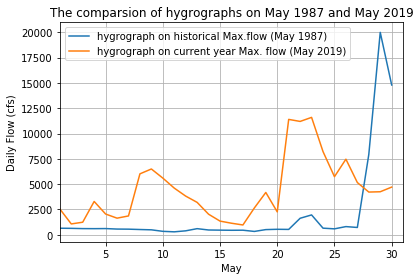

In [11]:
s_may=datetime.datetime(1987, 5, 1) #the start date of May on historical peak discharge 
e_may=datetime.datetime(1987, 5, 31) #the end date of May on historical peak discharge
may_data=station.make_timeseries(start = s_may, end = e_may)
s_may2=datetime.datetime(2019, 5, 1) #the start date of May on current year peak discharge
e_may2=datetime.datetime(2019, 5, 31) #the end date of May on current year peak discharge
may2_data=station.make_timeseries(start = s_may2, end = e_may2)
a1=[]
for w in range(1,len(may_data)+1):
    a1.append(w)
s3=plt.subplot(111)
s3.set_title('The comparsion of hygrographs on May {} and May {}'.format(s_may.year,s_may2.year))
s3.set_ylabel('Daily Flow (cfs)')
s3.set_xlabel('May')
s3.plot(a1,may_data,label='hygrograph on historical Max.flow (May {})'.format(s_may.year))
s3.plot(a1,may2_data,label='hygrograph on current year Max. flow (May {})'.format(s_may2.year))
plt.xlim(1,31)
leg=s3.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A comparison of 25-year-period flow duration curves have been plotted by using following code. From the result, we can see the flow data in the historical period of station monitoring didn't change rapidly. The massive difference occured on the 90% of the lowest flow. This might be because of the climate change or the controling of Canton Lake dam(should study more in the future).   

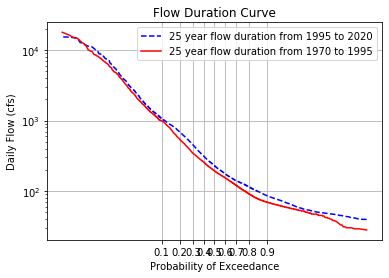

In [25]:
s_25=datetime.datetime(e_max.year-25, 1, 1)
if s_25.year>s_max.year:
    e_25=e_max
    s2_25=datetime.datetime(s_25.year-25, 1, 1)
    if s2_25.year>s_max.year:
        e2_25=s_25
        data2=station.make_timeseries(start = s_25, end = e_25) 
        data2.sort()
        data3=station.make_timeseries(start = s2_25, end = e2_25)
        data3.sort()

        s4=plt.subplot(111)
        s4.set_title('Flow Duration Curve')
        s4.set_yscale('log')
        s4.set_ylabel('Daily Flow (cfs)')
        s4.set_xlabel('Probability of Exceedance')
        s4.xaxis.set_ticks(norm_ticks)
        s4.set_xticklabels(ticks)
        daily_ppf=[norm.ppf(i1/len(data2)) for i1 in range(len(data2))]
        daily_ppf.reverse()
        #daily_ppf1=[norm.ppf(i1/len(data3)) for i1 in range(len(data3))]
        #daily_ppf1.reverse()
        s4.plot(daily_ppf, data2, '--', color = 'blue',
            label='25 year flow duration from {} to {}'.format(s_25.year,e_25.year))

        s4.plot(daily_ppf, data3, '-', color = 'red',
            label='25 year flow duration from {} to {}'.format(s2_25.year,e2_25.year))
        leg=s4.legend()
        plt.grid(True)
        plt.show()
    else:
        print('Error:The selected gagestation do not have enough data for 25 year period')
else: 
    print('Error:The selected gagestation do not have enough data for 25 year period')


To clearly display the percipitation effect for stream discharge, The daily rainfall data information had been download form following website manually: http://www.mesonet.org/index.php/weather/daily_data_retrieval   
The selected gagestation is located on Oklahoma city southeast county. The required time period had been set on the year 2019.

Result:
The plotted graphs clearly show the change of stream discharge following the vary daily rainfall. the remarkable point is on January, Auguest, and October although the percipitation had a huge increase(local rainfall)in this area, the stream discharge didn't change too rapidly. Only on May and June the percipitation rapidly affect the stream flow. Personally, I think it is because of the Caton Lake Dam controlling.   

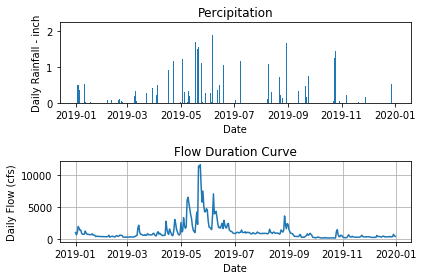

In [21]:
import csv
filename_1='67333754.csv' # define filename

with open (filename_1, 'r') as f: # open indeicated filename file  for read only 
                              #and ensure the file is 'clean up' after finish the process 
    reader=csv.reader(f)  #read file by using reader process under cvs library 
    headers=next(reader)  #skip the header row in the file
    rain=[]
    dates=[]
    for row in reader:
        dates.append(datetime.datetime(int(row[0]),int(row[1]),int(row[2])))
        rain.append(float(row[4]))
    

sub=plt.subplot(211)
sub.set_title('Percipitation')
sub.set_ylabel('Daily Rainfall - inch')
sub.set_xlabel('Date')
sub.bar(dates,rain)

sub2=plt.subplot(212)
sub2.set_title('Flow Duration Curve')
sub2.set_ylabel('Daily Flow (cfs)')
sub2.set_xlabel('Date')
sub2.plot(a,data)

plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusion 
The Python programing language vastly compress the time on downloading massive data information. And it could helpfully analyze the downloaded data by adding some assistant package. This might save a lot money on buying some expensive analyzing software. The new users also can easily modify and add extend new features and packages to improve the built program since the python is a ‘open source’ computer language. 